# IMDB Example

This example is based on an example from François Chollet's Deep Learning
with Python that was also made available in the
`3.5-classifying-movie-reviews.ipynb` notebook at

    https://github.com/fchollet/deep-learning-with-python-notebooks

In [1]:
from keras import layers, models
from keras.datasets import imdb
from keras.layers import Dense
from keras.losses import binary_crossentropy
from keras.optimizers import RMSprop
from keras.utils import to_categorical

import numpy as np

from pybt import Population

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.

    return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model = models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(lr=0.001),
              loss=binary_crossentropy,
              metrics=['accuracy'])

17465344/17464789 [==============================] - 4s 0us/step


In [4]:
# Create a population with this model and train for 2 steps
pop = Population(model=model,
    step_args = {'x': partial_x_train, 'y': partial_y_train,
                 'validation_data': (x_val, y_val),
                 'batch_size': 512},
    eval_args = {'x': x_val, 'y': y_val})
model = pop.train(num_steps = 1)

10000/10000 [==============================] - 1s 97us/step
Train on 15000 samples, validate on 10000 samples
Epoch 1/2
15000/15000 [==============================] - 2s 157us/step - loss: 0.5089 - acc: 0.7814 - val_loss: 0.3794 - val_acc: 0.8683
Epoch 2/2
10000/10000 [==============================] - 1s 98us/step


In [5]:
h = model.fit(x=partial_x_train, y=partial_y_train)

Epoch 1/1
15000/15000 [==============================] - 3s 219us/step - loss: 0.2224 - acc: 0.9155


In [9]:
h.logs

AttributeError: 'History' object has no attribute 'logs'

## Plotting population results

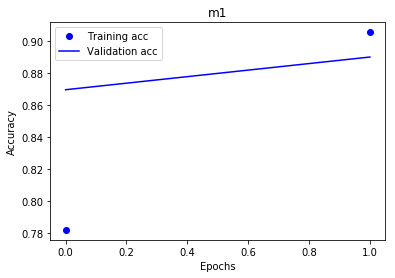

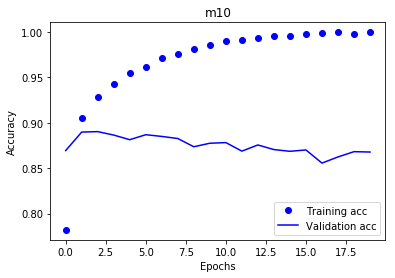

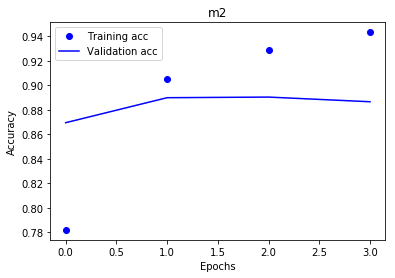

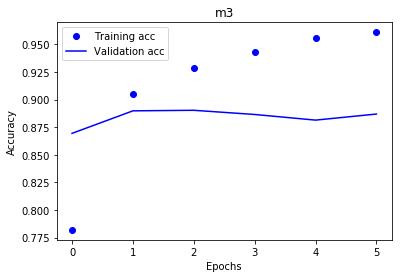

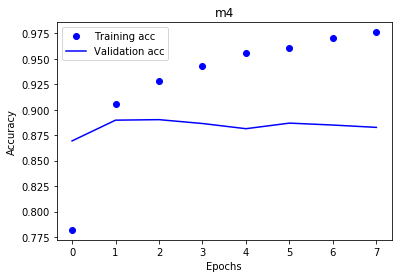

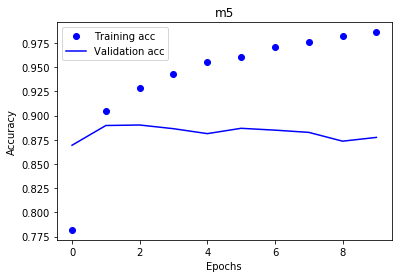

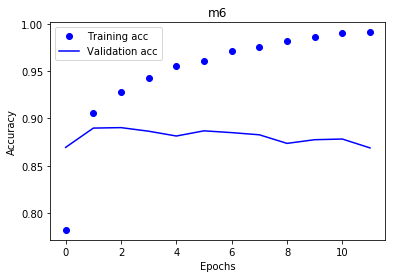

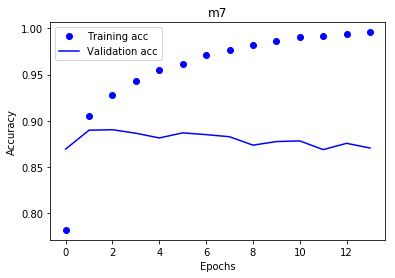

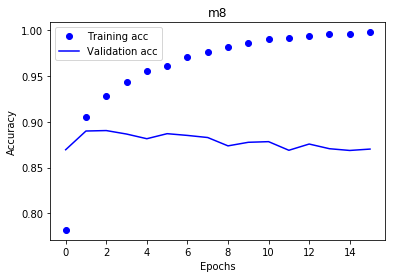

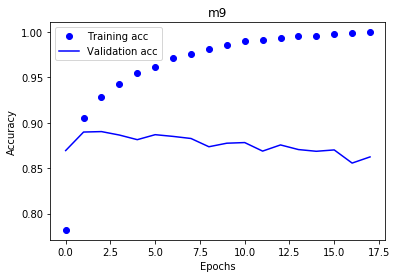

In [7]:
import matplotlib.pyplot as plt

df = pop.as_data_frame()

for model_name, model_obs in df.groupby(['model']):
    plt.plot(model_obs['epoch'], model_obs['acc'], 'bo', label='Training acc')
    plt.plot(model_obs['epoch'], model_obs['val_acc'], 'b', label='Validation acc')
    plt.title(model_name)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


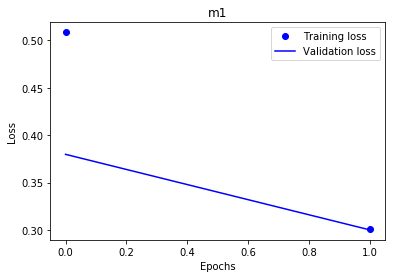

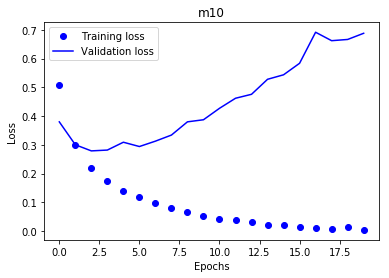

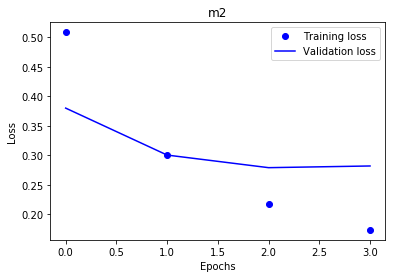

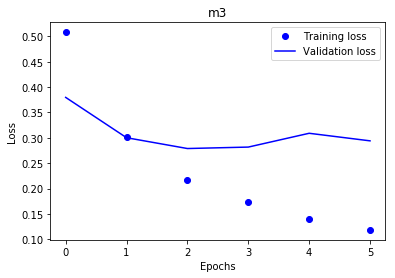

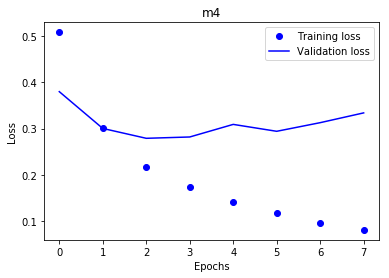

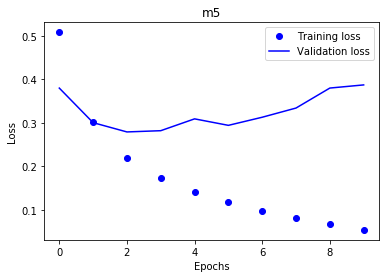

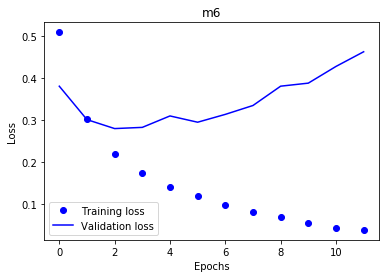

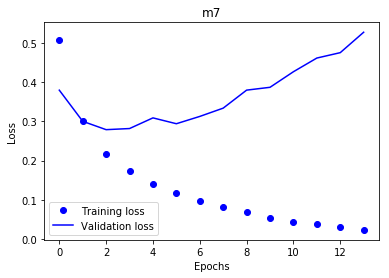

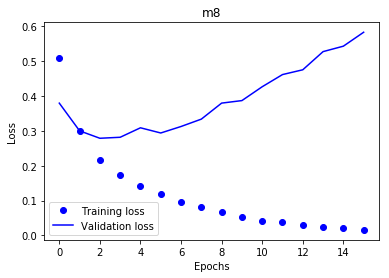

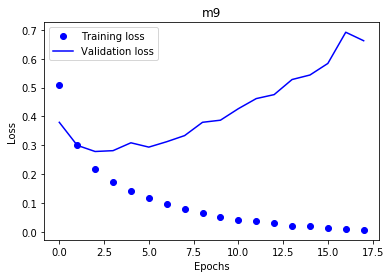

In [8]:
for model_name, model_obs in df.groupby(['model']):
    plt.plot(model_obs['epoch'], model_obs['loss'], 'bo', label='Training loss')
    plt.plot(model_obs['epoch'], model_obs['val_loss'], 'b', label='Validation loss')
    plt.title(model_name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()